In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Column Types:
Numerical:CustomerID,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited

Categorical:surname,geography,gender

In [8]:
#removing unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df['CreditScore'].mean()

650.5288

Text(0.5, 1.0, 'Distribution of CreditScore')

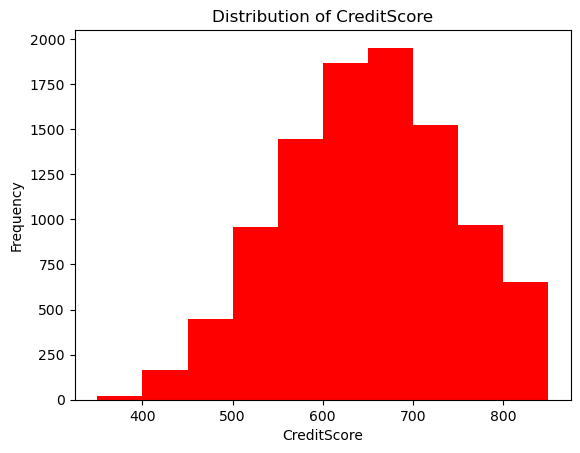

In [23]:
df['CreditScore'].plot(kind='hist',color='red')
plt.xlabel('CreditScore')
plt.title('Distribution of CreditScore')

Text(0.5, 1.0, 'Distribution of Age')

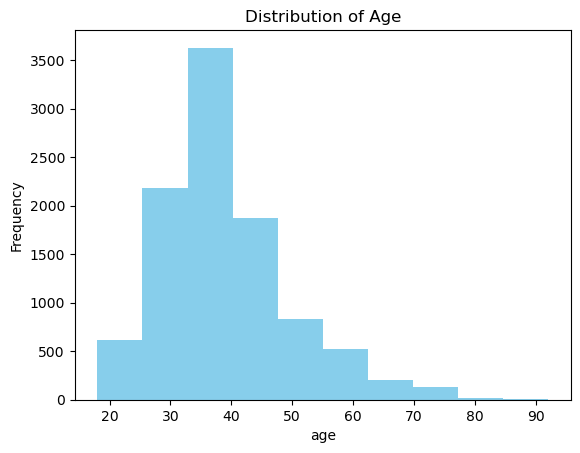

In [20]:
df['Age'].plot(kind='hist',color='skyblue')
plt.xlabel('age')
plt.title('Distribution of Age')

<AxesSubplot: >

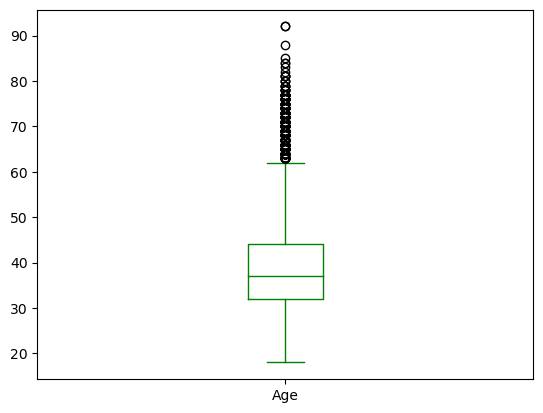

In [24]:
df['Age'].plot(kind='box',color='green')

In [25]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot: >

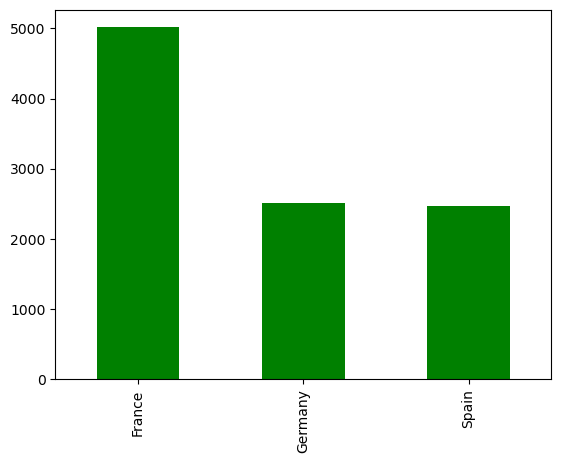

In [26]:
df['Geography'].value_counts().plot(kind='bar',color='green')

<AxesSubplot: ylabel='Frequency'>

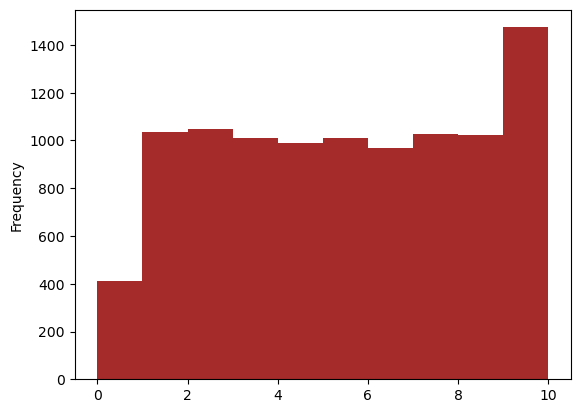

In [30]:
df['Tenure'].plot(kind='hist',color='brown')

<AxesSubplot: ylabel='Frequency'>

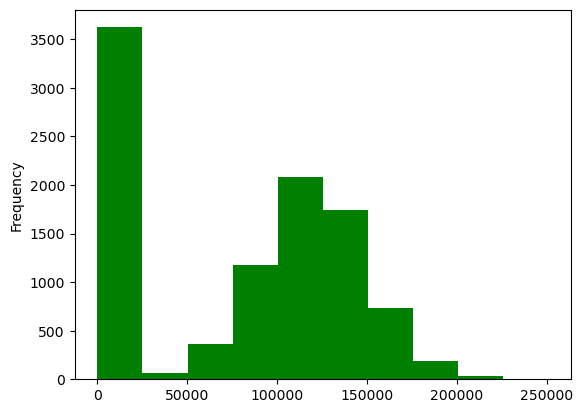

In [32]:
df['Balance'].plot(kind='hist',color='green')

In [33]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<AxesSubplot: ylabel='Frequency'>

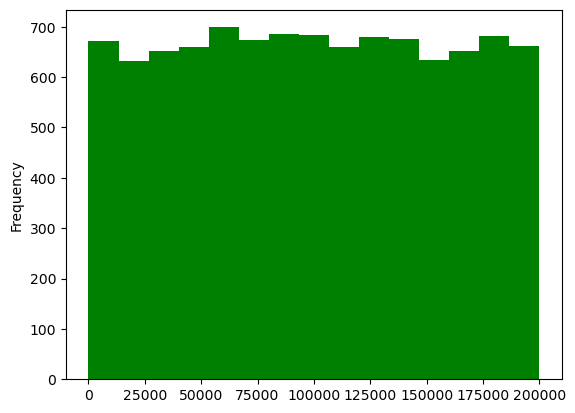

In [36]:
df['EstimatedSalary'].plot(kind='hist',color='green',bins=15)

<AxesSubplot: ylabel='Exited'>

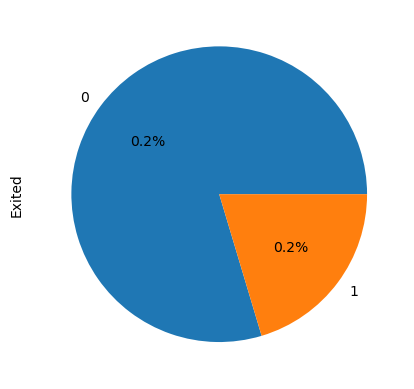

In [42]:
df['Exited'].value_counts().plot(kind='pie',autopct='0.2%%')

<AxesSubplot: >

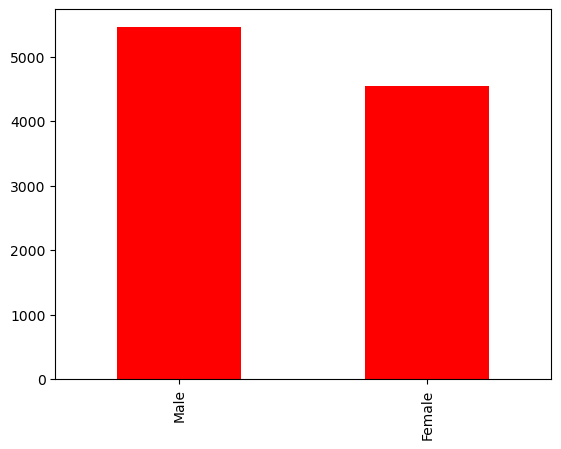

In [45]:
df['Gender'].value_counts().plot(kind='bar',color='red')

<AxesSubplot: >

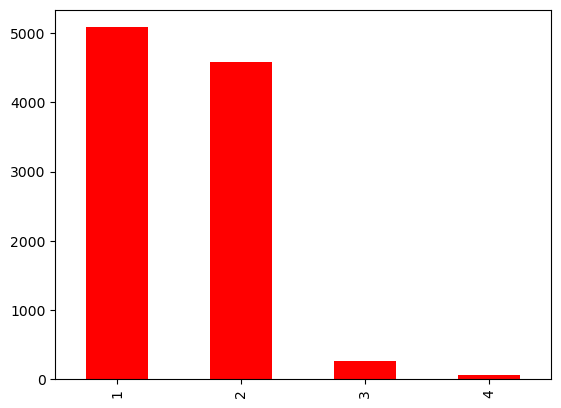

In [49]:
df['NumOfProducts'].value_counts().plot(kind='bar',color='red')

<AxesSubplot: >

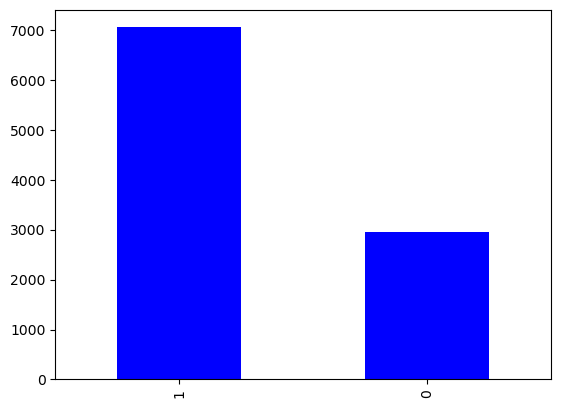

In [50]:
df['HasCrCard'].value_counts().plot(kind='bar',color='blue')

<AxesSubplot: >

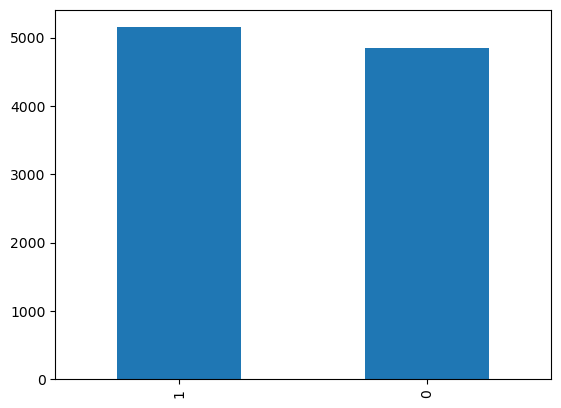

In [52]:
df['IsActiveMember'].value_counts().plot(kind='bar')

<AxesSubplot: >

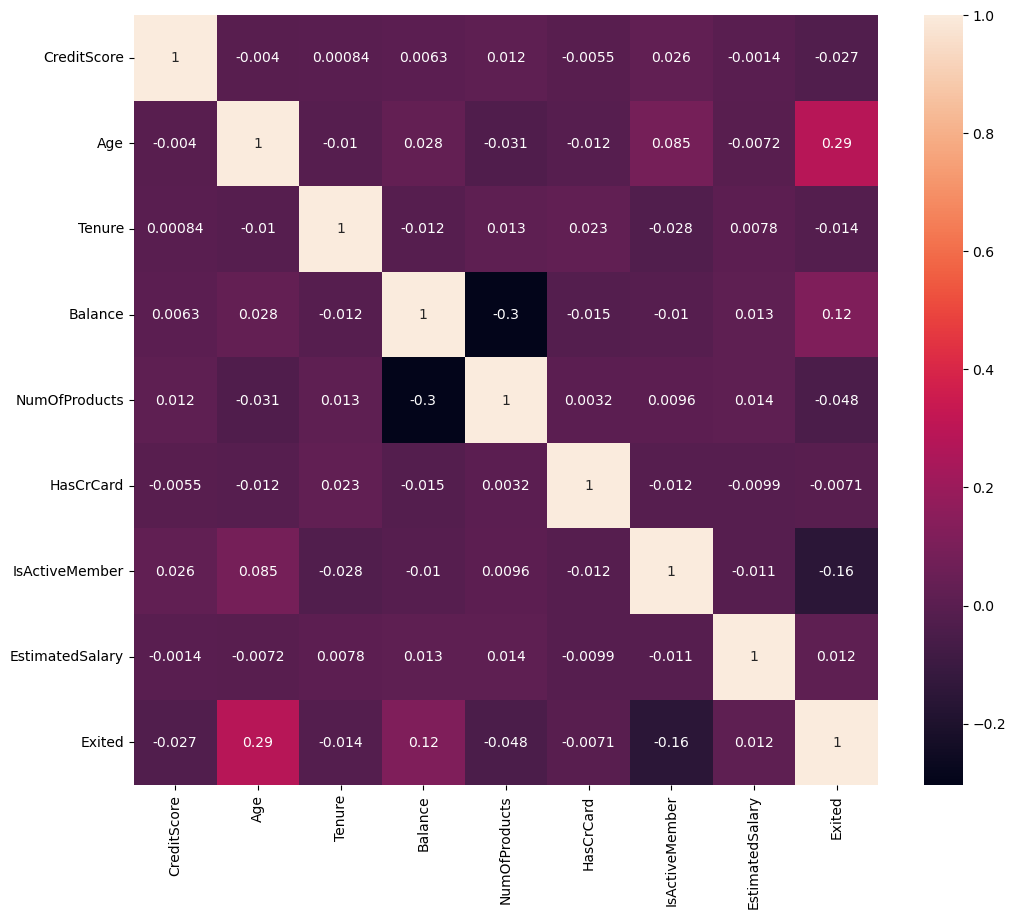

In [54]:
num_cols = df.select_dtypes(include = ['float64','int64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True)

In [57]:
#dropping few more columns
df.drop(columns=['CreditScore','Tenure','NumOfProducts','HasCrCard',],inplace=True)

In [58]:
df

,Geography,Gender,Age,Balance,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,0.00,1,101348.88,1
1,Spain,Female,41,83807.86,1,112542.58,0
2,France,Female,42,159660.80,0,113931.57,1
3,France,Female,39,0.00,0,93826.63,0
4,Spain,Female,43,125510.82,1,79084.10,0
...,...,...,...,...,...,...,...
9995,France,Male,39,0.00,0,96270.64,0
9996,France,Male,35,57369.61,1,101699.77,0
9997,France,Female,36,0.00,1,42085.58,1
9998,Germany,Male,42,75075.31,0,92888.52,1


In [59]:
def rescale_column(column):
    min_value = column.min()
    max_value = column.max()
    scaled_column = (column - min_value) / (max_value - min_value)
    return scaled_column

In [64]:
df['Age']=rescale_column(df['Age'])
df['Balance']=rescale_column(df['Balance'])
df['EstimatedSalary']=rescale_column(df['EstimatedSalary'])

In [69]:
df

,Geography,Gender,Age,Balance,IsActiveMember,EstimatedSalary,Exited
0,France,Female,0.324324,0.000000,1,0.506735,1
1,Spain,Female,0.310811,0.334031,1,0.562709,0
2,France,Female,0.324324,0.636357,0,0.569654,1
3,France,Female,0.283784,0.000000,0,0.469120,0
4,Spain,Female,0.337838,0.500246,1,0.395400,0
...,...,...,...,...,...,...,...
9995,France,Male,0.283784,0.000000,0,0.481341,0
9996,France,Male,0.229730,0.228657,1,0.508490,0
9997,France,Female,0.243243,0.000000,1,0.210390,1
9998,Germany,Male,0.324324,0.299226,0,0.464429,1


In [70]:
df.drop(['IsActiveMember'],inplace=True,axis=1)

In [80]:
df=pd.get_dummies(df,columns=['Geography','Gender'])

In [81]:
y=df['Exited']
x=df.drop(['Exited'],axis=1)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [84]:
model=RandomForestClassifier()

In [85]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_predict=model.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
print(f"Accuracy is {accuracy_score(y_predict,y_test)*100}")

Accuracy is 79.9
